# Прогнозирование конечных свойств новых материалов (композиционных материалов). 

**Актуальность** Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.

**Описание.** Композиционные материалы - это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т.е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).


**Исходные данные.** На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 

Данные содержаться в двух файлах:
* X_bp.xlsx
* X_nup.xlsx

## Загрузка данных и библиотек

Импортируем библиотеки необходимы для работы\
Numpy – библиотека для для работы с числовыми массивами, векторами и матрицами, а также позволяет строить графики и гистограммы.\
Pandas - библиотека для анализа структурированных данных, которые размещены в таблицах.\
Seaborn - библиотека для создания статистических графиков.\
Matplotlib — библиотека для визуализации данных.\
Pyplot — модуль в пакете Matplotlib, matplotlib.pyplot - модуль помогает автоматически создавать оси, фигуры и другие компоненты.\
%matplotlib inline  - для отображения и хранения графиков, построения графика отображается во внешних интерфейсах (блокнот Jupyter), непосредственно под ячейкой кода, которая его создала.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Загружаем данные в переменные df_bp и df_nup

In [2]:
df_bp = pd.read_excel('X_bp.xlsx')
df_nup = pd.read_excel('X_nup.xlsx')

## Разведочный анализ и предобработка данных

### Предварительное изучение данных

Выведим на обзор пять строк рандомных каждой таблицы в одной ячейке

In [3]:
from IPython.display import display
display(df_bp.sample(5)), display(df_nup.sample(5));

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
927         927                         3.582426       1981.625629   
32           32                         3.277087       2010.047012   
209         209                         2.031785       1953.102734   
498         498                         3.885846       1945.263177   
804         804                         2.398612       1986.168146   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
927             130.017404                    91.479721   
32              339.550423                    67.498993   
209             191.199207                   135.606635   
498             846.764369                   128.163423   
804            1014.994422                    89.445178   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
927                        18.686048                257.683616   
32                         24.280609                254.949084   
209                        19.781174                295.852961   
498                        24.093162                316.790835   
804                        22.710725                293.617655   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
927                     505.951021                             71.471784   
32                      117.535234                             67.478707   
209                     619.911604                             76.186142   
498                     236.285721                             74.454794   
804                     531.150643                             70.307327   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
927                    2925.799730               187.134923  
32                     2462.605386               207.018581  
209                    3232.139442               186.783814  
498                    2855.131016               221.939702  
804                    2256.858423               262.072287

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
605          605                  90     8.139645          56.326376
549          549                  90     7.174620          58.400998
1005        1005                  90     8.448110          58.776645
29            29                  90     7.000000          57.000000
268          268                   0     4.803995          79.931964

Посмотрим размеры таблиц через функцию shape, которая возвращает кортеж размерности массива

In [4]:
df_bp.shape,df_nup.shape

((1023, 11), (1040, 4))

Выведим на обзор последние строки каждой таблицы в одной ячейке

In [5]:
from IPython.display import display
display(df_bp.tail()), display(df_nup.tail());

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

Датасеты имеют разное количество строк 1022 и 1039

Посмотрим общую информацию о каждой табличке

In [6]:
df_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [7]:
df_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [8]:
df_bp.describe().T

count         mean         std  \
Unnamed: 0                            1023.0   511.000000  295.458965   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Unnamed: 0                               0.000000   255.500000   511.000000   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Unnamed: 0                             766.500000  1022.000000  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

In [9]:
df_nup.describe()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
count  1040.000000          1040.00000  1040.000000        1040.000000
mean    519.500000            45.00000     6.911385          57.248399
std     300.366443            45.02165     2.555181          12.332438
min       0.000000             0.00000     0.000000           0.000000
25%     259.750000             0.00000     5.102256          49.970740
50%     519.500000            45.00000     6.938000          57.413594
75%     779.250000            90.00000     8.587662          65.107235
max    1039.000000            90.00000    14.440522         103.988901

Объедим датасеты, метод пересечения множеств, через функцию merge() по индексу с типом объединения INNER

In [10]:
data = df_bp.merge(df_nup, how='inner')

In [11]:
# Основные статистические характеристки набора данных
data.describe().T

count         mean         std  \
Unnamed: 0                            1023.0   511.000000  295.458965   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Unnamed: 0                               0.000000   255.500000   511.000000   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Unnamed: 0                             766.500000  1022.000000  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

После объединения файлов часть строк были удалены, итоговый файл содержит 1023 строки.

In [12]:
#столбец "Unnamed" неинформативен, удаляем его
data.drop(columns=['Unnamed: 0'], inplace=True)
data

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Выводим название всех столбцов

In [13]:
data.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Для удобства дальнейшей работы переименуем столбцы

In [14]:
data.columns=['Соотношение_матрица_наполнитель', 'Плотность',
       'Модуль_упругости', 'Количество_отвердителя',
       'Содержание_эпоксидных_групп', 'Температура_вспышки',
       'Поверхностная_плотность', 'Модуль_упругости_при_растяжении',
       'Прочность_при_растяжении', 'Потребление_смолы',
       'Угол_нашивки', 'Шаг_нашивки', 'Плотность_нашивки']

In [15]:
#Проверяем
data.head(2)

Соотношение_матрица_наполнитель  Плотность  Модуль_упругости  \
0                         1.857143     2030.0        738.736842   
1                         1.857143     2030.0        738.736842   

   Количество_отвердителя  Содержание_эпоксидных_групп  Температура_вспышки  \
0                    30.0                    22.267857           100.000000   
1                    50.0                    23.750000           284.615385   

   Поверхностная_плотность  Модуль_упругости_при_растяжении  \
0                    210.0                             70.0   
1                    210.0                             70.0   

   Прочность_при_растяжении  Потребление_смолы  Угол_нашивки  Шаг_нашивки  \
0                    3000.0              220.0             0          4.0   
1                    3000.0              220.0             0          4.0   

   Плотность_нашивки  
0               57.0  
1               60.0

Проверяем наличие пропусков

In [16]:
data.isna().sum()

Соотношение_матрица_наполнитель    0
Плотность                          0
Модуль_упругости                   0
Количество_отвердителя             0
Содержание_эпоксидных_групп        0
Температура_вспышки                0
Поверхностная_плотность            0
Модуль_упругости_при_растяжении    0
Прочность_при_растяжении           0
Потребление_смолы                  0
Угол_нашивки                       0
Шаг_нашивки                        0
Плотность_нашивки                  0
dtype: int64

Проверяем таблицу на наличие дубликатов

In [17]:
data.duplicated().sum()

0

Выводим тип данных итоговой таблицы

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение_матрица_наполнитель  1023 non-null   float64
 1   Плотность                        1023 non-null   float64
 2   Модуль_упругости                 1023 non-null   float64
 3   Количество_отвердителя           1023 non-null   float64
 4   Содержание_эпоксидных_групп      1023 non-null   float64
 5   Температура_вспышки              1023 non-null   float64
 6   Поверхностная_плотность          1023 non-null   float64
 7   Модуль_упругости_при_растяжении  1023 non-null   float64
 8   Прочность_при_растяжении         1023 non-null   float64
 9   Потребление_смолы                1023 non-null   float64
 10  Угол_нашивки                     1023 non-null   int64  
 11  Шаг_нашивки                      1023 non-null   float64
 12  Плотность_нашивки   

У нас отсутствуют пропуски, все колонки имеют тип данных с плавающей точкой float 64, кроме колонки "Угол нашивки", в котором целый тип данных int

Посмотрим сколько уникальных значений в каждом столбце

In [19]:
data.nunique()

Соотношение_матрица_наполнитель    1014
Плотность                          1013
Модуль_упругости                   1020
Количество_отвердителя             1005
Содержание_эпоксидных_групп        1004
Температура_вспышки                1003
Поверхностная_плотность            1004
Модуль_упругости_при_растяжении    1004
Прочность_при_растяжении           1004
Потребление_смолы                  1003
Угол_нашивки                          2
Шаг_нашивки                         989
Плотность_нашивки                   988
dtype: int64

В каждой колонке практически все значения уникальны, кроме колонки "Угол нашивки", в ней 2 значения

Посмотрим какое количество каждого значения в столбце "Угол нашивки"

In [20]:
data['Угол_нашивки'].value_counts()

0     520
90    503
Name: Угол_нашивки, dtype: int64

Так как у нас только два значения, заменим значения 0 и 90 на 0 и 1 соответственно, присвоение осуществим через словарь

In [21]:
data['Угол_нашивки'] = data['Угол_нашивки'].map({0.0:0, 90.0:1}).astype(int)

In [22]:
#проверяем
data['Угол_нашивки'].value_counts()

0    520
1    503
Name: Угол_нашивки, dtype: int64

Построим матрицы диаграмм рассеяния (попарные графики рассеяния точек)

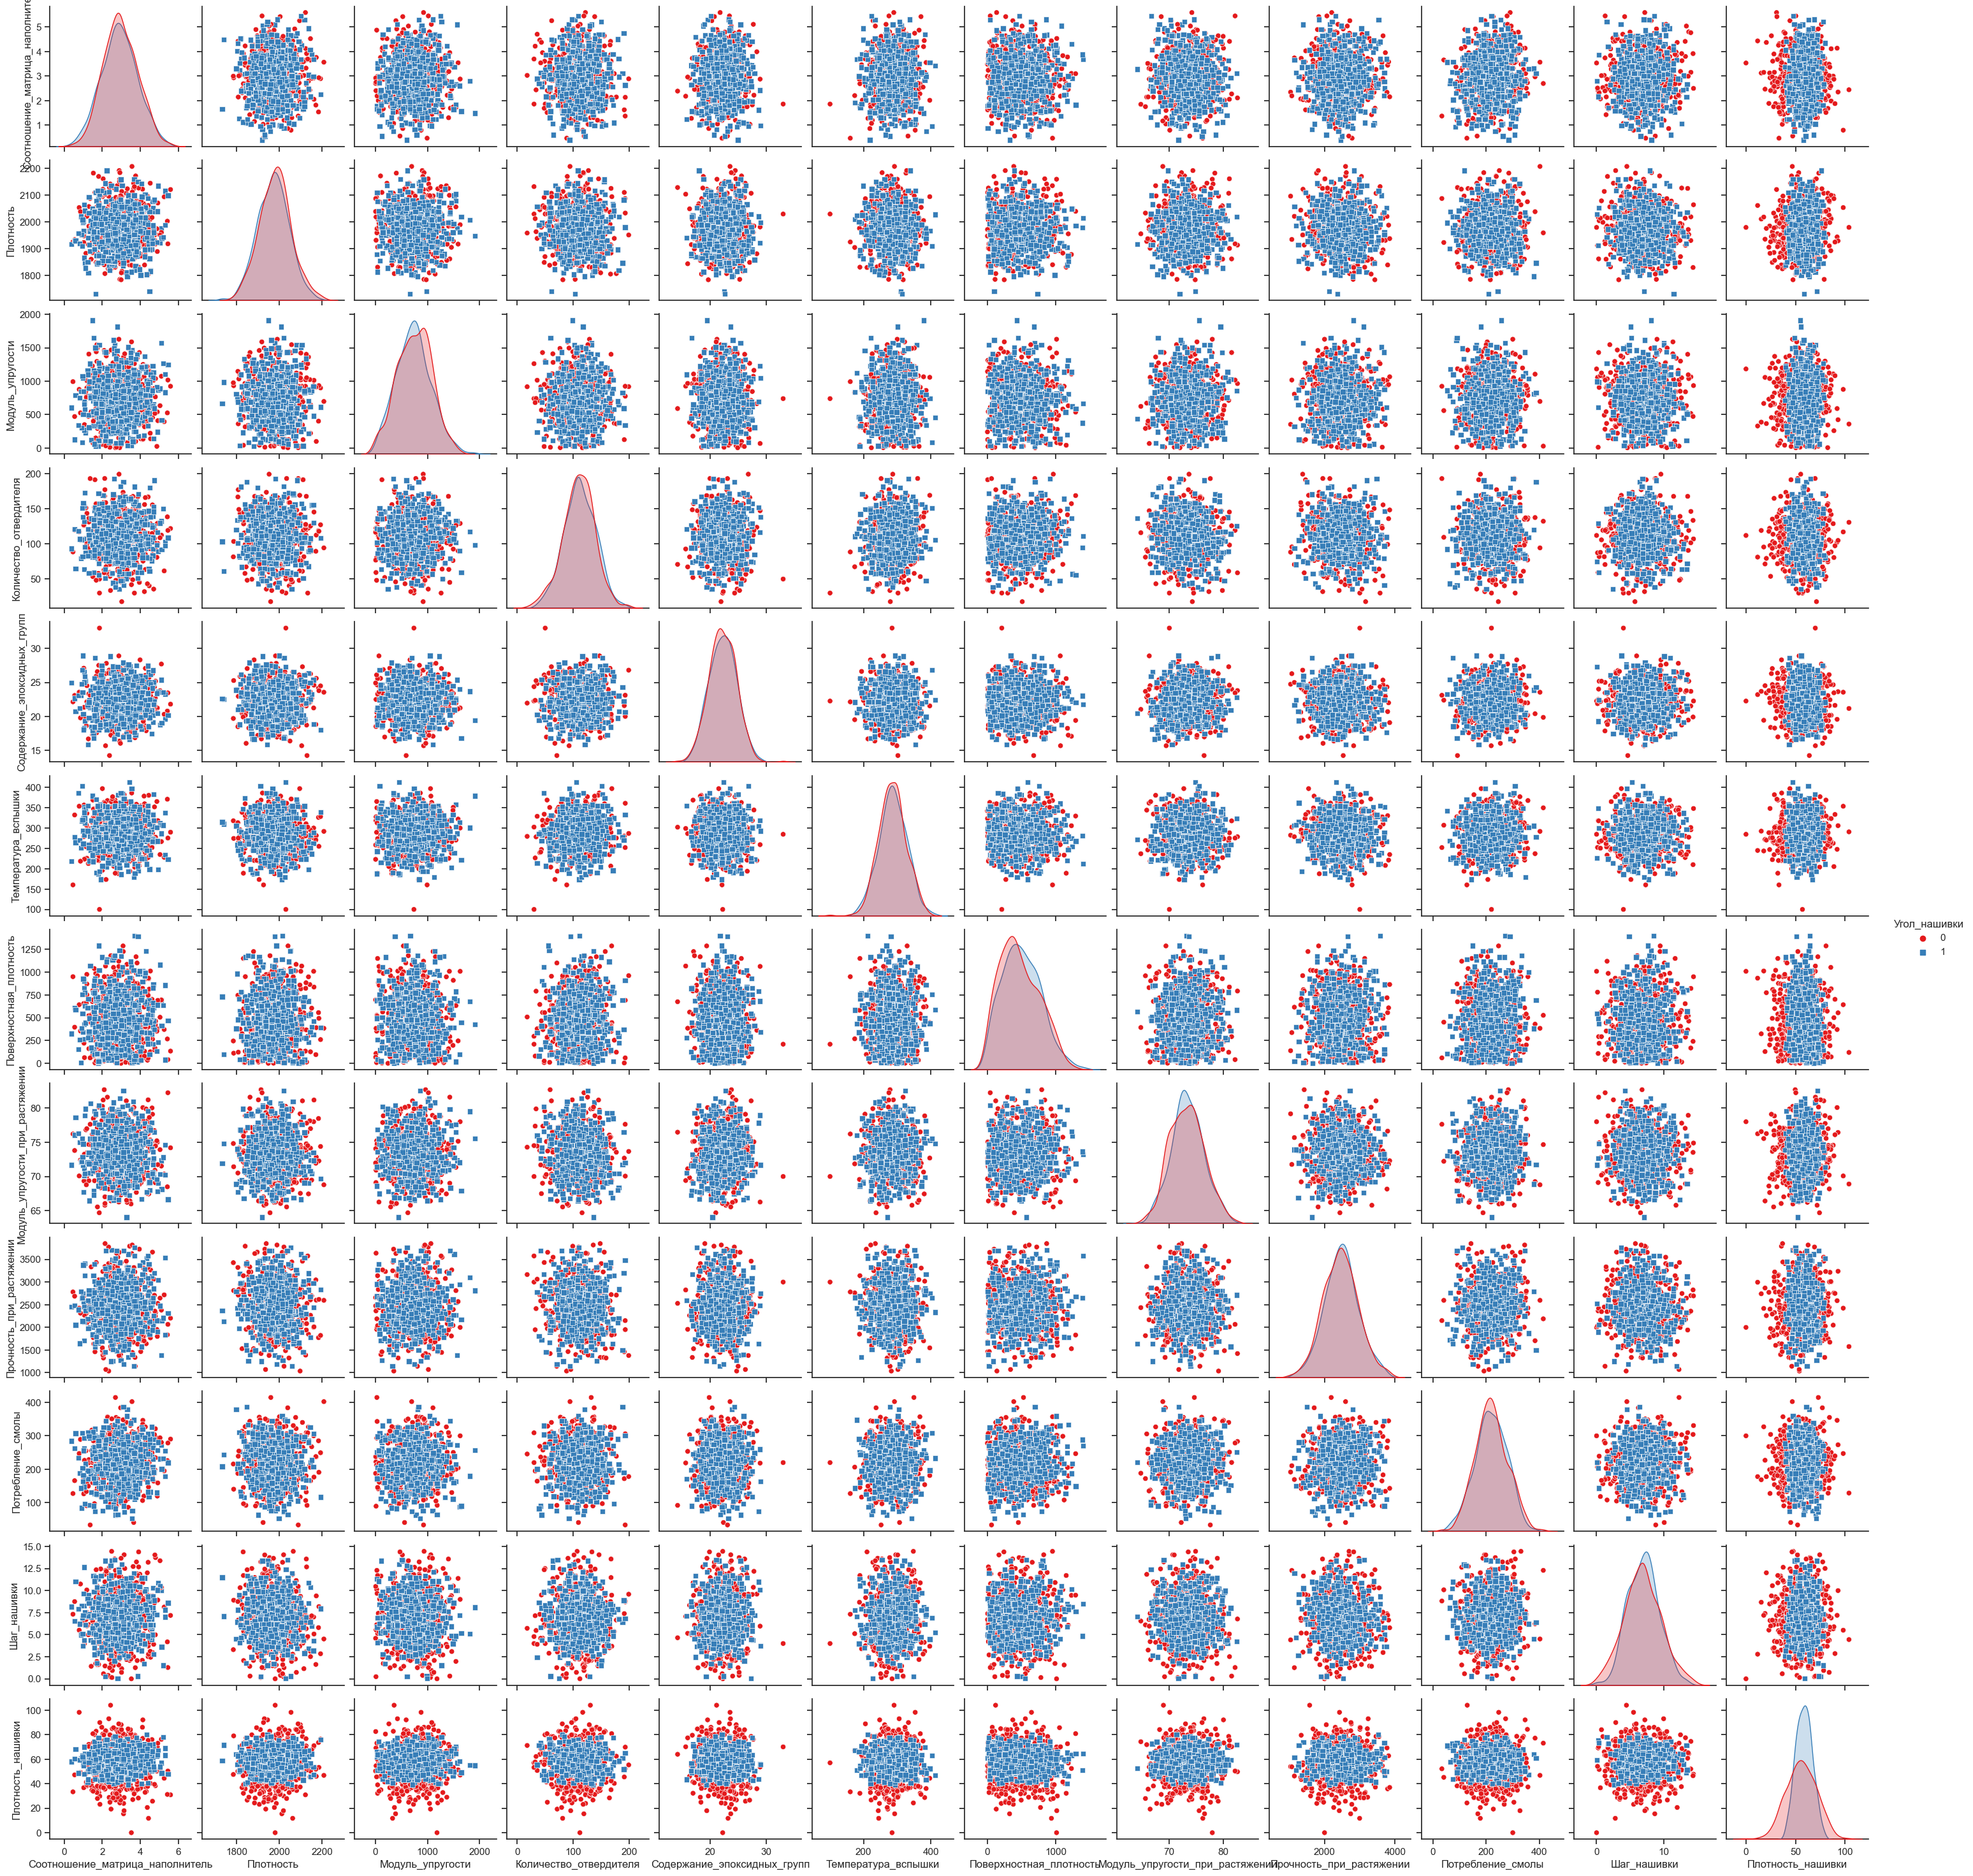

In [24]:
sns.set_style('ticks')
sns.pairplot(data, hue = 'Угол_нашивки', markers=["o", "s"], diag_kind= 'auto', palette='Set1')

Попарные графики рассеяния точек не показывают какой-либо зависимости между данными

Исследуем каждый признак


Гистограмма и ящик с усами для признака: Соотношение_матрица_наполнитель


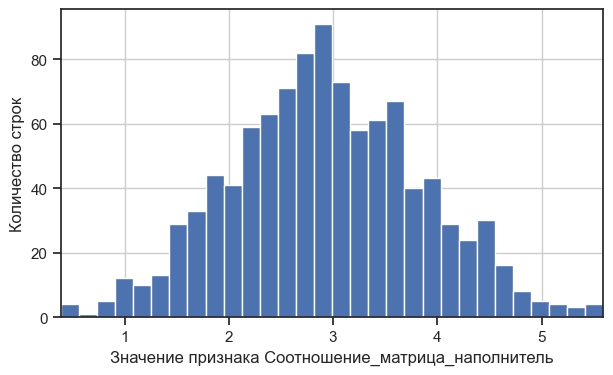

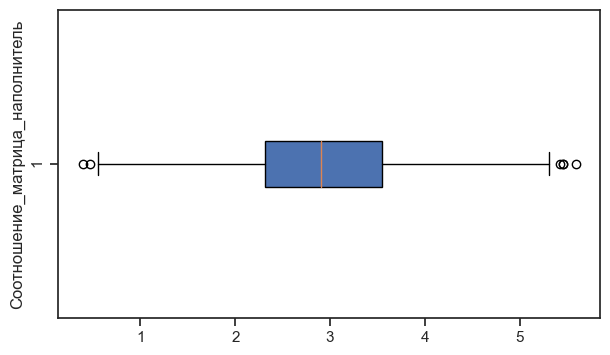


Гистограмма и ящик с усами для признака: Плотность


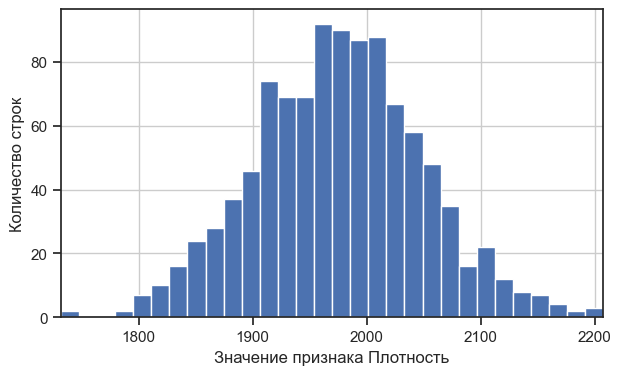

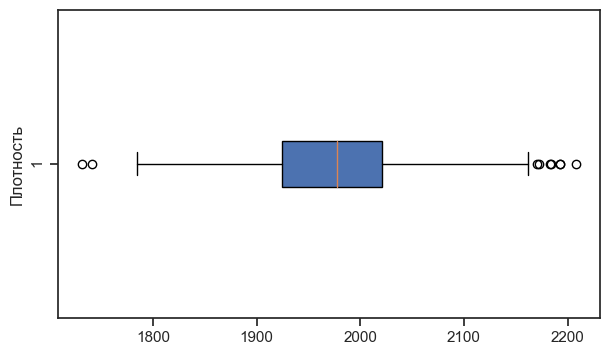


Гистограмма и ящик с усами для признака: Модуль_упругости


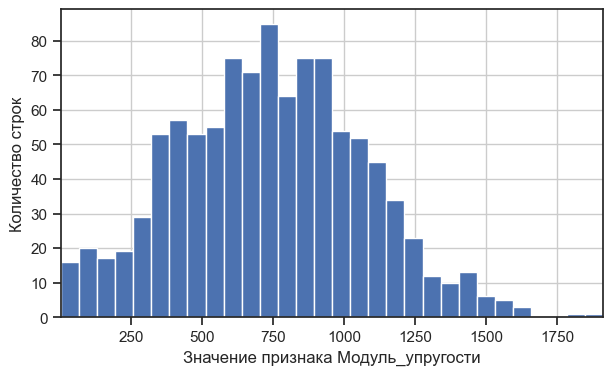

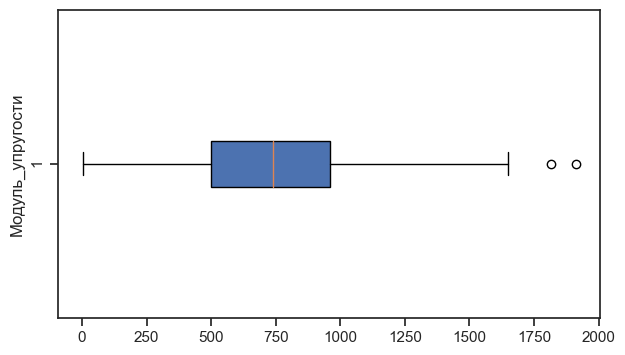


Гистограмма и ящик с усами для признака: Количество_отвердителя


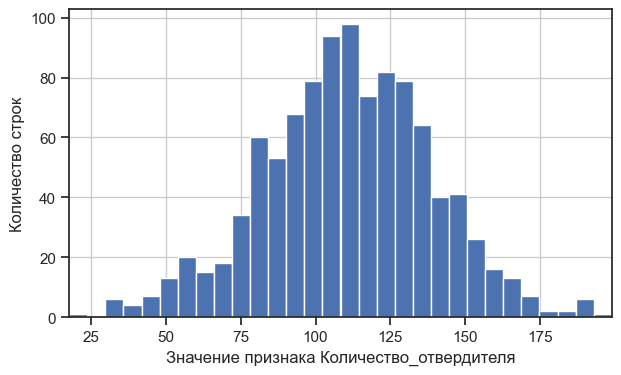

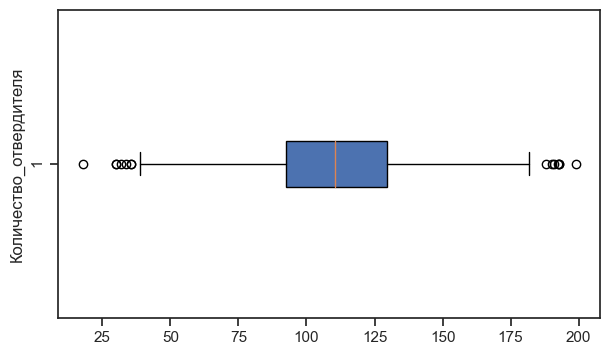


Гистограмма и ящик с усами для признака: Содержание_эпоксидных_групп


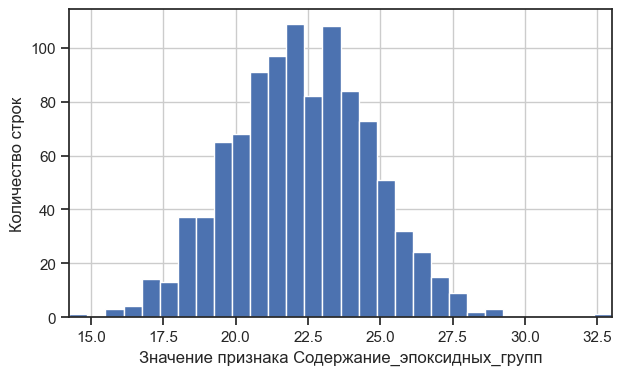

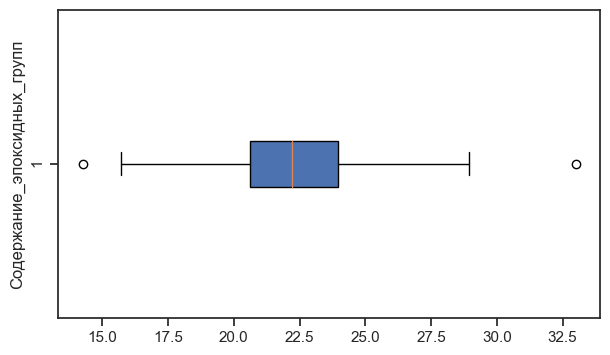


Гистограмма и ящик с усами для признака: Температура_вспышки


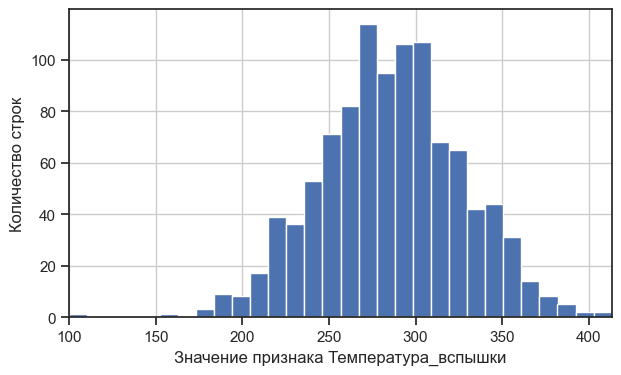

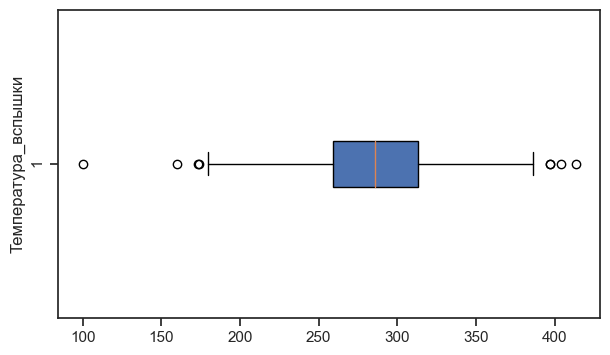


Гистограмма и ящик с усами для признака: Поверхностная_плотность


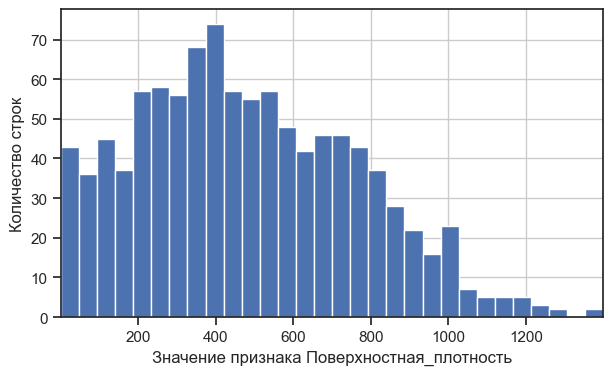

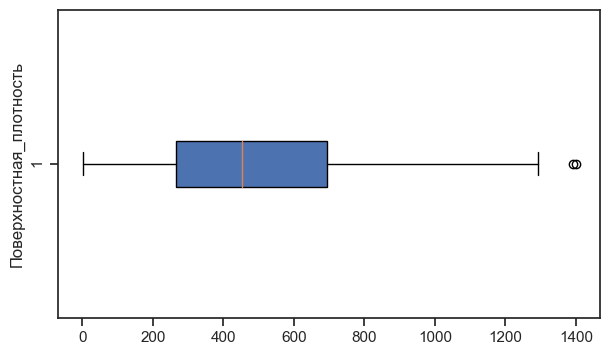


Гистограмма и ящик с усами для признака: Модуль_упругости_при_растяжении


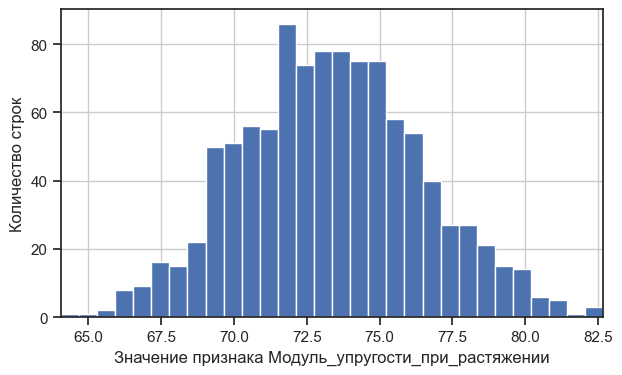

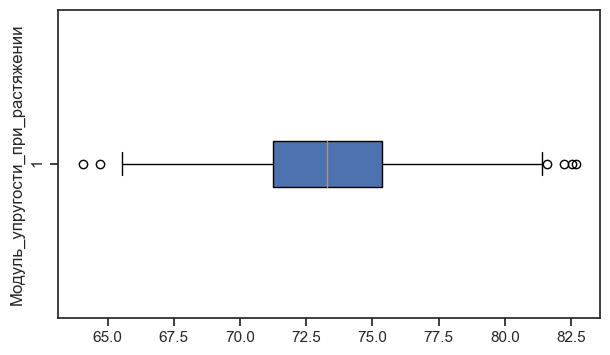


Гистограмма и ящик с усами для признака: Прочность_при_растяжении


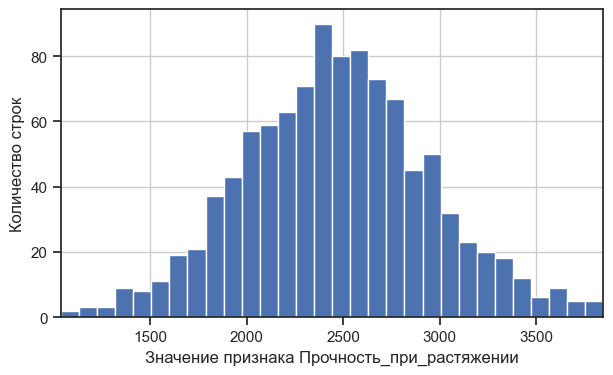

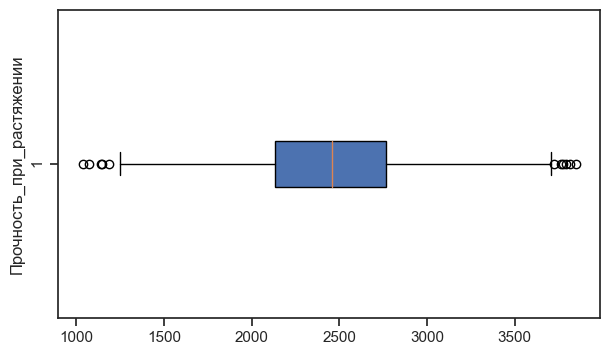


Гистограмма и ящик с усами для признака: Потребление_смолы


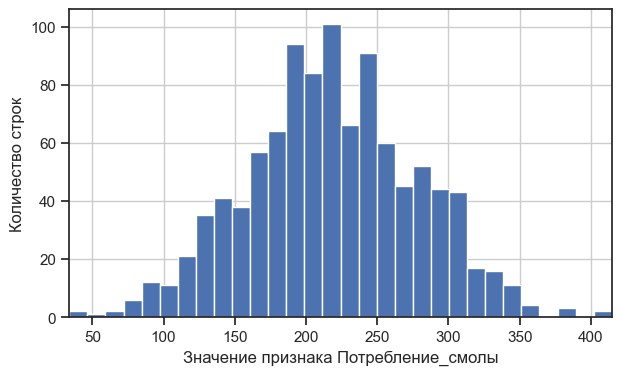

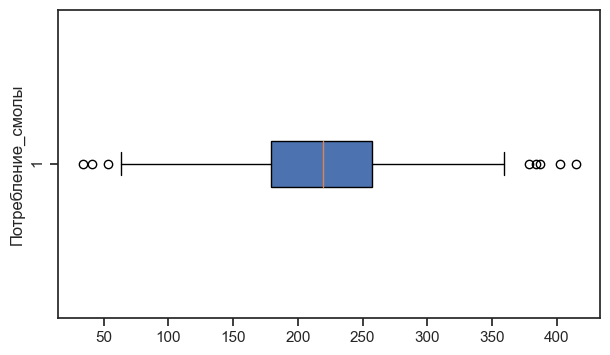


Гистограмма и ящик с усами для признака: Угол_нашивки


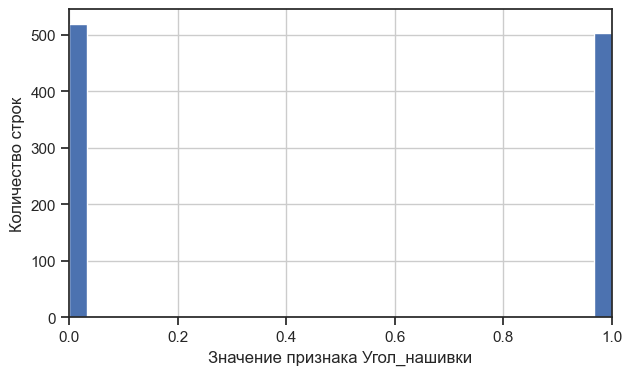

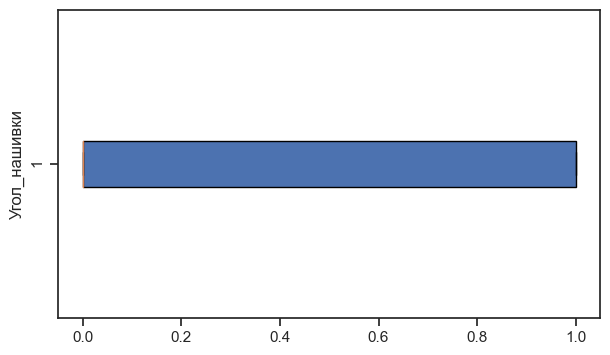


Гистограмма и ящик с усами для признака: Шаг_нашивки


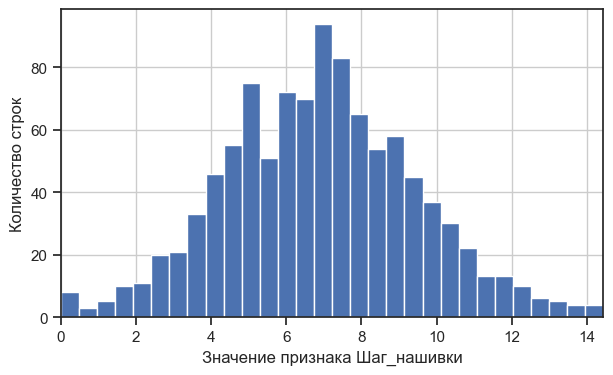

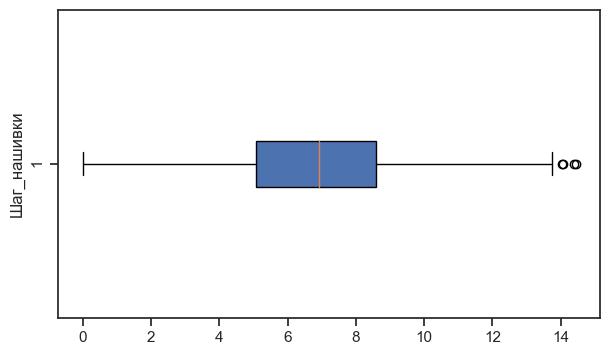


Гистограмма и ящик с усами для признака: Плотность_нашивки


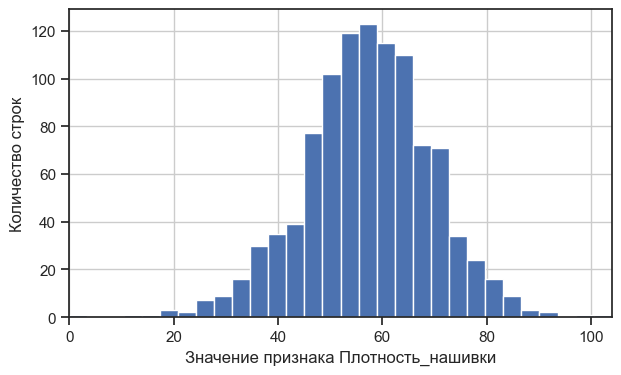

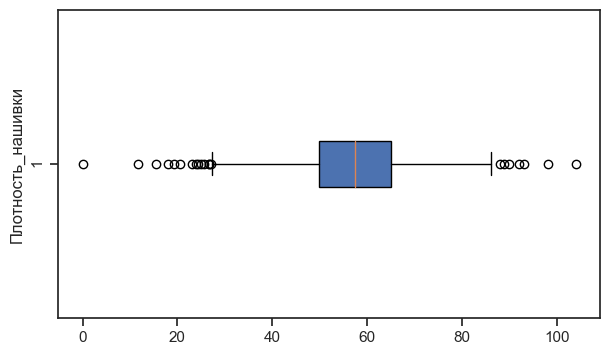

In [42]:
# Построим гистограммы и ящик с усами для признаков
sig = list(data.columns.values) # создадим список с названиями признаков

for i in range(len(sig)): #перебор каждого признака
    print('')
    print("Гистограмма и ящик с усами для признака: "+ sig[i])
    
    plt.figure(figsize=(5,4))
    data[sig[i]].hist(bins=30, figsize=(7,4))
    plt.xlabel('Значение признака ' + sig[i])        #ось x
    plt.ylabel('Количество строк')                   #ось y
    plt.xlim(data[sig[i]].min(), data[sig[i]].max()) #диапазон оси
    plt.show()

    plt.figure(figsize=(7,4))
    plt.boxplot(data[sig[i]], vert=False, patch_artist=True) #patch_artist - синий цвет, vert - горизонтальный вывод
    plt.yticks(rotation=90)
    plt.ylabel(sig[i])
    plt.show()  

Наблюдается в основном нормальное распределение у признаков, кроме "Шага нашивки", и у "Угла нашивки".

Видно, что выбросы имеют все характеристики, кроме параметра "Угол нашивки".
Влияние выбросов на модель:

* Данные оказались в искаженном формате.
* Изменяет общее статистическое распределение данных с точки зрения среднего значения, дисперсии и т.д.
* Приводит к искажению уровня точности модели.

Из-за вышеуказанных причин необходимо обнаружить и избавиться от выбросов до моделирования набора данных.

Посмотрим корреляционные матрицы.\
Существует три распространенных способа измерения корреляции:
Корреляция Пирсона: используется для измерения корреляции между двумя непрерывными переменными. (например, рост и вес)\
Корреляция Спирмена: используется для измерения корреляции между двумя ранжированными переменными. (например, оценка балла учащегося на экзамене по математике и оценка его оценки на экзамене по естественным наукам в классе)\
Корреляция Кендалла: используется, когда вы хотите использовать корреляцию Спирмена, но размер выборки мал и имеется много связанных рангов.

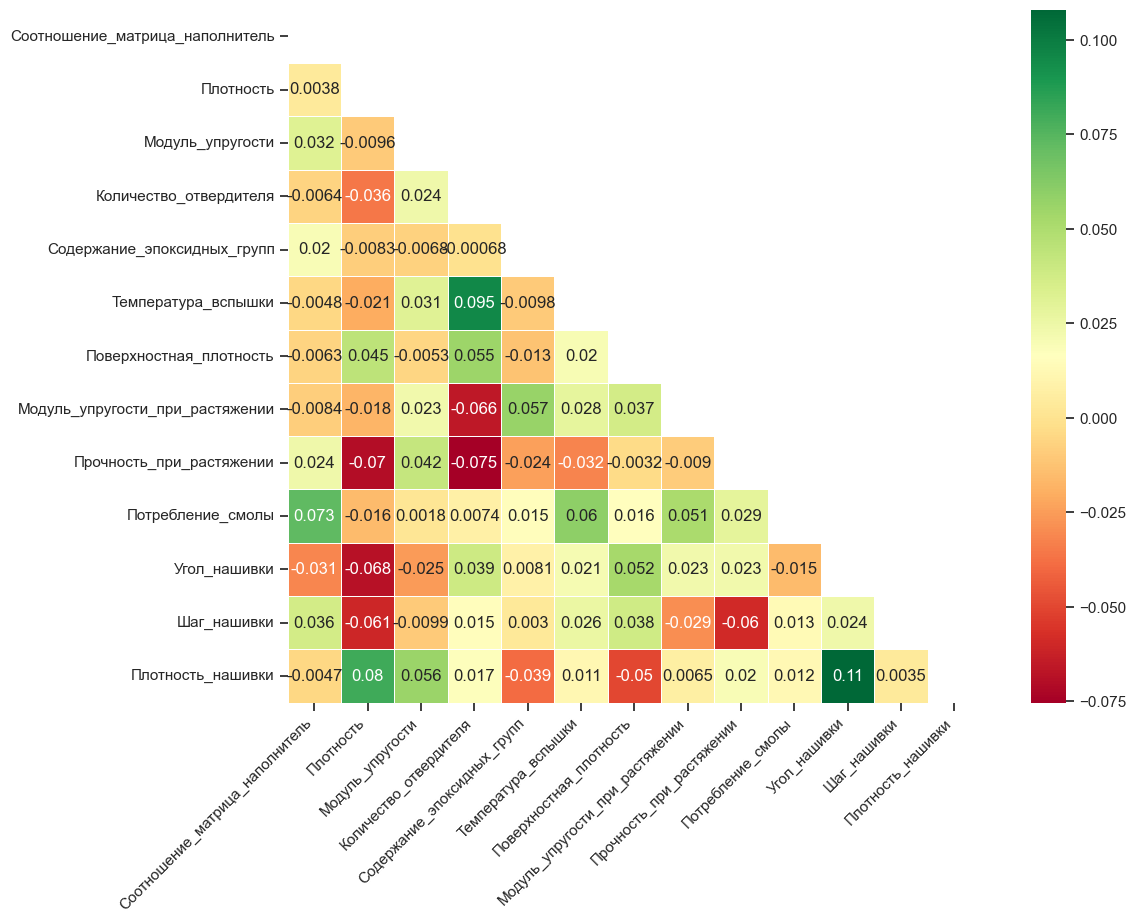

In [43]:
# Коэффициент корреляции Пирсона
mask = np.triu(data.corr(method = 'pearson'))
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap='RdYlGn',linewidths=.5)
plt.xticks(rotation=45, ha='right')
plt.show()

Максимальная корреляция наблюдается 0,11 между "Плотностью нашивки" и "углом нашивки", что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

In [49]:
# Посчитаем количество выбросов
total = 0    #счетчик

def lower_upper_whisker(i): #Функция для расчета значения верхнего и нижнего уса
    table=data[sig[i]].describe()
    if table[4]-1.5*(table[6]-table[4])<table[3]:
        p_lower = table[3]
    else:
        p_lower = table[4]-1.5*(table[6]-table[4])       
    p_upper = table[6]+1.5*(table[6]-table[4])
    return p_lower, p_upper

for i in range(len(sig)):
    p_lower, p_upper = lower_upper_whisker(i)    
    print((len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower])),'строк содержат выбросы в столбце', sig[i])
    total += (len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower]))

print('-------------------------------------------------------------------------------------------------------')     
print("Всего строк с выбросами в данных:", total)
print("Процент строк с выбросами в данных от всего датафрейма: {:.2%}".format(total/len(data)))

6 строк содержат выбросы в столбце Соотношение_матрица_наполнитель
9 строк содержат выбросы в столбце Плотность
2 строк содержат выбросы в столбце Модуль_упругости
14 строк содержат выбросы в столбце Количество_отвердителя
2 строк содержат выбросы в столбце Содержание_эпоксидных_групп
8 строк содержат выбросы в столбце Температура_вспышки
2 строк содержат выбросы в столбце Поверхностная_плотность
6 строк содержат выбросы в столбце Модуль_упругости_при_растяжении
11 строк содержат выбросы в столбце Прочность_при_растяжении
8 строк содержат выбросы в столбце Потребление_смолы
0 строк содержат выбросы в столбце Угол_нашивки
4 строк содержат выбросы в столбце Шаг_нашивки
21 строк содержат выбросы в столбце Плотность_нашивки
-------------------------------------------------------------------------------------------------------
Всего строк с выбросами в данных: 93
Процент строк с выбросами в данных от всего датафрейма: 9.09%


In [50]:
#Удалим выбросы
#Воспользуемся методом перцентиля (numpy.percentile)
for col in data.columns:
    q25,q75 = np.percentile(data.loc[:,col],[25,75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

#Заменяем нулевыми значениями
    data.loc[data[col] < min,col] = np.nan
    data.loc[data[col] > max,col] = np.nan

# замена пустых значений на медиану
data = data.fillna(data.median())

Проверяем наличие выбросов на новых данных

In [53]:
total = 0    #счетчик
for i in range(len(sig)):
    p_lower, p_upper = lower_upper_whisker(i)    
    print((len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower])),'строк содержат выбросы в столбце', sig[i])
    total += (len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower]))

print('-------------------------------------------------------------------------------------------------------')     
print("Всего строк с выбросами в данных:", total)
print("Процент строк с выбросами в данных от всего датафрейма: {:.2%}".format(total/len(data)))

0 строк содержат выбросы в столбце Соотношение_матрица_наполнитель
0 строк содержат выбросы в столбце Плотность
1 строк содержат выбросы в столбце Модуль_упругости
0 строк содержат выбросы в столбце Количество_отвердителя
0 строк содержат выбросы в столбце Содержание_эпоксидных_групп
1 строк содержат выбросы в столбце Температура_вспышки
0 строк содержат выбросы в столбце Поверхностная_плотность
1 строк содержат выбросы в столбце Модуль_упругости_при_растяжении
4 строк содержат выбросы в столбце Прочность_при_растяжении
2 строк содержат выбросы в столбце Потребление_смолы
0 строк содержат выбросы в столбце Угол_нашивки
0 строк содержат выбросы в столбце Шаг_нашивки
6 строк содержат выбросы в столбце Плотность_нашивки
-------------------------------------------------------------------------------------------------------
Всего строк с выбросами в данных: 15
Процент строк с выбросами в данных от всего датафрейма: 1.47%


Повторяем процедуру замены выбросов на медианное значение

In [54]:
for col in data.columns:
    q25,q75 = np.percentile(data.loc[:,col],[25,75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

    data.loc[data[col] < min,col] = np.nan
    data.loc[data[col] > max,col] = np.nan

data = data.fillna(data.median())

Проверяем и удаляем, пока не избавимся от выбросов

In [55]:
total = 0    #счетчик
for i in range(len(sig)):
    p_lower, p_upper = lower_upper_whisker(i)    
    print((len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower])),'строк содержат выбросы в столбце', sig[i])
    total += (len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower]))

print('-------------------------------------------------------------------------------------------------------')     
print("Всего строк с выбросами в данных:", total)
print("Процент строк с выбросами в данных от всего датафрейма: {:.2%}".format(total/len(data)))

0 строк содержат выбросы в столбце Соотношение_матрица_наполнитель
0 строк содержат выбросы в столбце Плотность
0 строк содержат выбросы в столбце Модуль_упругости
0 строк содержат выбросы в столбце Количество_отвердителя
0 строк содержат выбросы в столбце Содержание_эпоксидных_групп
0 строк содержат выбросы в столбце Температура_вспышки
0 строк содержат выбросы в столбце Поверхностная_плотность
0 строк содержат выбросы в столбце Модуль_упругости_при_растяжении
1 строк содержат выбросы в столбце Прочность_при_растяжении
0 строк содержат выбросы в столбце Потребление_смолы
0 строк содержат выбросы в столбце Угол_нашивки
0 строк содержат выбросы в столбце Шаг_нашивки
2 строк содержат выбросы в столбце Плотность_нашивки
-------------------------------------------------------------------------------------------------------
Всего строк с выбросами в данных: 3
Процент строк с выбросами в данных от всего датафрейма: 0.29%


In [56]:
for col in data.columns:
    q25,q75 = np.percentile(data.loc[:,col],[25,75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

    data.loc[data[col] < min,col] = np.nan
    data.loc[data[col] > max,col] = np.nan

data = data.fillna(data.median())

total = 0    #счетчик
for i in range(len(sig)):
    p_lower, p_upper = lower_upper_whisker(i)    
    print((len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower])),'строк содержат выбросы в столбце', sig[i])
    total += (len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower]))

print('-------------------------------------------------------------------------------------------------------')     
print("Всего строк с выбросами в данных:", total)
print("Процент строк с выбросами в данных от всего датафрейма: {:.2%}".format(total/len(data)))

0 строк содержат выбросы в столбце Соотношение_матрица_наполнитель
0 строк содержат выбросы в столбце Плотность
0 строк содержат выбросы в столбце Модуль_упругости
0 строк содержат выбросы в столбце Количество_отвердителя
0 строк содержат выбросы в столбце Содержание_эпоксидных_групп
0 строк содержат выбросы в столбце Температура_вспышки
0 строк содержат выбросы в столбце Поверхностная_плотность
0 строк содержат выбросы в столбце Модуль_упругости_при_растяжении
0 строк содержат выбросы в столбце Прочность_при_растяжении
0 строк содержат выбросы в столбце Потребление_смолы
0 строк содержат выбросы в столбце Угол_нашивки
0 строк содержат выбросы в столбце Шаг_нашивки
1 строк содержат выбросы в столбце Плотность_нашивки
-------------------------------------------------------------------------------------------------------
Всего строк с выбросами в данных: 1
Процент строк с выбросами в данных от всего датафрейма: 0.10%


In [57]:
for col in data.columns:
    q25,q75 = np.percentile(data.loc[:,col],[25,75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

    data.loc[data[col] < min,col] = np.nan
    data.loc[data[col] > max,col] = np.nan

data = data.fillna(data.median())

total = 0    #счетчик
for i in range(len(sig)):
    p_lower, p_upper = lower_upper_whisker(i)    
    print((len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower])),'строк содержат выбросы в столбце', sig[i])
    total += (len(data[data[sig[i]] > p_upper]) + len(data[data[sig[i]] < p_lower]))

print('-------------------------------------------------------------------------------------------------------')     
print("Всего строк с выбросами в данных:", total)
print("Процент строк с выбросами в данных от всего датафрейма: {:.2%}".format(total/len(data)))

0 строк содержат выбросы в столбце Соотношение_матрица_наполнитель
0 строк содержат выбросы в столбце Плотность
0 строк содержат выбросы в столбце Модуль_упругости
0 строк содержат выбросы в столбце Количество_отвердителя
0 строк содержат выбросы в столбце Содержание_эпоксидных_групп
0 строк содержат выбросы в столбце Температура_вспышки
0 строк содержат выбросы в столбце Поверхностная_плотность
0 строк содержат выбросы в столбце Модуль_упругости_при_растяжении
0 строк содержат выбросы в столбце Прочность_при_растяжении
0 строк содержат выбросы в столбце Потребление_смолы
0 строк содержат выбросы в столбце Угол_нашивки
0 строк содержат выбросы в столбце Шаг_нашивки
0 строк содержат выбросы в столбце Плотность_нашивки
-------------------------------------------------------------------------------------------------------
Всего строк с выбросами в данных: 0
Процент строк с выбросами в данных от всего датафрейма: 0.00%


Выбросов нет, посмотрим статистические характеристики очищенных данных

In [59]:
data.describe().T

count         mean         std          min  \
Соотношение_матрица_наполнитель  1023.0     2.925146    0.892296     0.547391   
Плотность                        1023.0  1974.778867   70.843002  1784.482245   
Модуль_упругости                 1023.0   736.834332  325.204734     2.436909   
Количество_отвердителя           1023.0   110.558141   26.661661    38.668500   
Содержание_эпоксидных_групп      1023.0    22.241659    2.369521    15.695894   
Температура_вспышки              1023.0   286.053223   39.213922   186.508613   
Поверхностная_плотность          1023.0   480.886331  278.400394     0.603740   
Модуль_упругости_при_растяжении  1023.0    73.302809    3.032067    65.553336   
Прочность_при_растяжении         1023.0  2459.670550  457.512250  1250.392802   
Потребление_смолы                1023.0   218.392942   57.277545    72.530873   
Угол_нашивки                     1023.0     0.491691    0.500175     0.000000   
Шаг_нашивки                      1023.0     6.870613    2.521972     0.000000   
Плотность_нашивки                1023.0    57.558971   10.804565    29.745849   

                                         25%          50%          75%  \
Соотношение_матрица_наполнитель     2.321061     2.906383     3.548775   
Плотность                        1924.535020  1977.450684  2020.628746   
Модуль_упругости                  500.047452   738.957167   957.175119   
Количество_отвердителя             92.883002   110.564840   129.233303   
Содержание_эпоксидных_групп        20.615227    22.230744    23.961468   
Температура_вспышки               259.487105   285.896812   312.586724   
Поверхностная_плотность           266.816645   451.313045   691.775979   
Модуль_упругости_при_растяжении    71.287231    73.264735    75.316695   
Прочность_при_растяжении         2146.295983  2457.959767  2751.668715   
Потребление_смолы                 180.146597   219.179155   256.760915   
Угол_нашивки                        0.000000     0.000000     1.000000   
Шаг_нашивки                         5.080033     6.908628     8.575956   
Плотность_нашивки                  50.350869    57.516472    64.561409   

                                         max  
Соотношение_матрица_наполнитель     5.314144  
Плотность                        2161.565216  
Модуль_упругости                 1628.000000  
Количество_отвердителя            181.828448  
Содержание_эпоксидных_групп        28.955094  
Температура_вспышки               386.067992  
Поверхностная_плотность          1291.340115  
Модуль_упругости_при_растяжении    81.203147  
Прочность_при_растяжении         3656.158363  
Потребление_смолы                 359.052220  
Угол_нашивки                        1.000000  
Шаг_нашивки                        13.732404  
Плотность_нашивки                  85.660996

полученный новый датасет сохраним в отдельный файл, для удобства работы с ним в дальнейшем в другой тетрадке

In [60]:
data.to_excel('X_data.xlsx')